# 데이터 및 결측치 확인하기

## 파일 및 라이브러리 불러오기

In [51]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')  # matplotlib style 설정

# 사진 파일 불러오기
!pip install IPython
from IPython.display import Image

# 문법 변경에 의한 경고를 무시
import warnings
warnings.filterwarnings('ignore')

# matplotlib 시각화 결과를 jupyter notebook에서 바로 볼 수 있게 해주는 command
%matplotlib inline

In [52]:
# 데이터 불러오기
data = pd.read_csv('titanic_set.csv')

In [53]:
# 행과 열의 수 확인
data.shape

(891, 12)

In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


| Column | 설명 |  |
| --- | --- | --- |
| PassengerId | 탑승객의 고유 아이디 |  |
| Survival | 생존여부 | (0: 사망, 1: 생존) |
| Pclass | 등실의 등급 | (1: 1등급, 2: 2등급, 3: 3등급) |
| Name | 이름 |  |
| Sex | 성별 |  |
| Age | 나이 |  |
| Sibsp | 함께 탑승한 형제자매, 아내 남편의 수 |  |
| Parch | 함께 탑승한 부모, 자식의 수 |  |
| Ticket | 티켓번호 |  |
| Fare | 티켓의 요금 |  |
| Cabin | 객실번호 |  |
| Embarked | 배에 탑승한 위치 | (C = Cherbourg, Q = Queenstown, S = Southampton) |

## 결측값 확인하기

In [56]:
#결측값 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

데이터 분석에 들어가기 전에, __데이터에 결측치가 있는지 확인하고 이를 처리하는 과정__이 필요합니다.  
누락된 데이터는 분석 결과의 편향을 유발할 수 있으며, 이는 데이터 완성도를 판단하는데 중요한 역할을 합니다.  
결측값을 그대로 가지고 분석을 하게 되면 분석의 신뢰성이 떨어질 수 있습니다. 

-> 이 데이터 셋에는 __Age, Cabin, Embarked__에 결측치가 존재합니다. 각각의 feature들을 살펴보면서 처리해보겠습니다.

# 시각화 기본 표현

__1. Figure__  
- 그래프를 그리는 빈 도화지나 바탕을 의미  
- 그래프의 전체 영역을 의미하며, 그래프를 담는 가장 큰 단위  
- 'plt.figure()' 함수를 사용하여 새로운 Figure를 생성할 수 있으며, 여러 개의 Axes(Subplot)를 배치하여 그래프를 그릴 수 있음
- 'plt.gcf()' 함수를 사용하면 현재 그래프가 그려지고 있는 Figure에 접근할 수 있음  

__2. Subplots__  
- 서브플롯은 그래프가 실제로 그려지는 공간  
- 여러 개의 서브플롯을 사용하면 한 Figure 내에서 여러 개의 그래프를 동시에 표시할 수 있음  
- 'plt.subplots() 함수를 사용해 Figure를 분할하여 하나 이상의 서브플롯(Axes)를 생성할 수 있음  

__3. Size 조절__
- 그래프를 조절하기 위해 다양한 함수를 사용할 수 있음  
- 'fig.set_size_inches()' 메서드를 사용하여 Figure 객체의 크기를 조절할 수 있음  
- 'plt.figure(figsize=(width, height))'를 사용하여 새로운 Figure를 생성할 때 원하는 넓이와 높이를 지정할 수 있음  
- 'plt.rcParams['figure.figsize']를 설정하여 전체 스크립트나 노트북에서 기본적으로 사용할 그래프 크기를 설정할 수 있음  

__4. Axes__
- 그래프가 실제로 그려지는 영역  
- 서브플롯(Subplot)이라고도 불리며, 하나의 Figure 내에서 여러 개의 Axes를 생성하여 서로 다른 그래프를 표시할 수 있음  
- Axes는 복수형으로 여러 개의 서브플롯(AxesSubplot)을 나타내는 용어이며 'ax'는 하나의 그래프를 그리는 데 사용되는 객체를 의미함  

__5. Axis__
- 그래프 내에서 x축과 y축을 나타냄  
- 그래프의 가로 축은 x축, 세로 축은 y축으로 표현됨


Text(0.5, 1.0, 'number6')

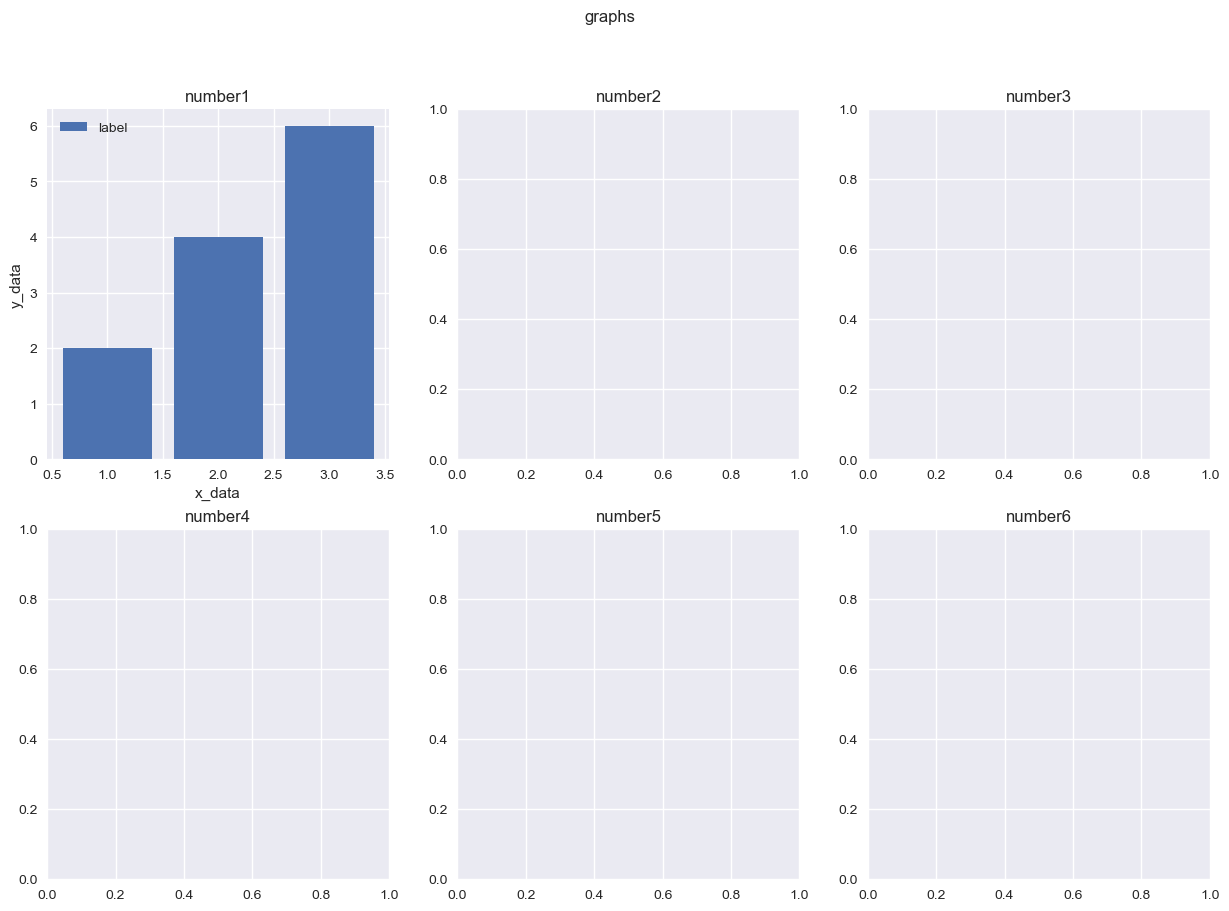

In [57]:
# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

x = [1, 2, 3]  # x 데이터
y = [2, 4, 6]  # y 데이터

# 2x3 그리드의 서브플롯을 생성하고, 전체 Figure의 크기를 지정
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Figure의 전체 타이틀을 설정
fig.suptitle('graphs')

# 첫 번째 서브플롯 (0행 0열)
ax[0, 0].bar(x, y, label='label')  ## 막대 그래프를 그림
ax[0, 0].set_title('number1')      ## 서브플롯의 제목을 설정
ax[0, 0].legend()                 ## 범례(legend)를 설정
ax[0, 0].set(xlabel='x_data', ylabel='y_data')  ## x축과 y축 레이블을 설정

#두번째그래프
ax[0,1].set_title('number2')

#세번째그래프
ax[0,2].set_title('number3')

#네번째그래프
ax[1,0].set_title('number4')

#세번째그래프
ax[1,1].set_title('number5')

#세번째그래프
ax[1,2].set_title('number6')

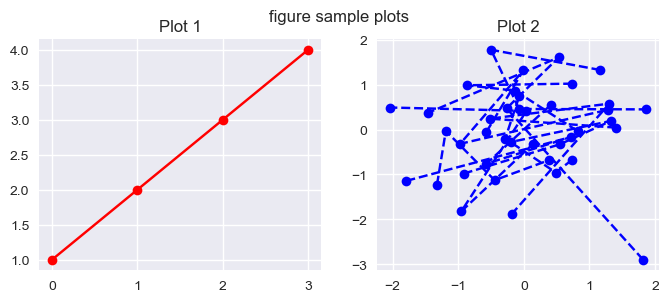

In [58]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 3))
fig.suptitle('figure sample plots')

# 1x2 그리드의 서브플롯을 생성하고, 전체 Figure의 크기를 지정
ax_lst = fig.subplots(1, 2)

# 첫 번째 서브플롯 (0행 0열)
ax_lst[0].plot([1, 2, 3, 4], 'ro-')  ## 빨간색 원형 마커로 선 그래프
ax_lst[0].set_title('Plot 1')       ## 서브플롯의 제목을 설정

# 두 번째 서브플롯 (0행 1열)
ax_lst[1].plot(np.random.randn(4, 10), np.random.randn(4, 10), 'bo--')  ## 파란색 원형 마커로 점선 그래프
ax_lst[1].set_title('Plot 2')                                            ## 서브플롯의 제목을 설정

plt.show()

In [59]:
# 그래프의 서식 설정
parameters = {
    'axes.titlesize': 25, ## 그래프의 제목 크기 설정
    'axes.labelsize': 20, ## 축 레이블의 글꼴 크기 설정
    'ytick.labelsize': 20 ## y축 눈금 레이블의 글꼴 크기 설정
}
# 설정한 서식 값을 현재 활성화된 Matplotlib 세션에 적용
plt.rcParams.update(parameters)

# 피처별 시각화 및 결측값 채우기

## 생존자 확인 [Survived]

1. 파이 차트(Pie chart)

    - 비율을 확인하기 좋은 그래프
    - explode : 부채꼴이 파이 차트의 중심에서 벗어나는 정도
    - autopct : 부채꼴 안에 표시될 숫자의 형식
    - shadow : True일 때 그림자 표시, False가 기본값
   
   
2. 카운트 플랏(Count plot)  

    - 항목별 개수를 확인할 때 사용
    - 해당 컬럼을 구성하고 있는 value들을 구분하여 보여줌

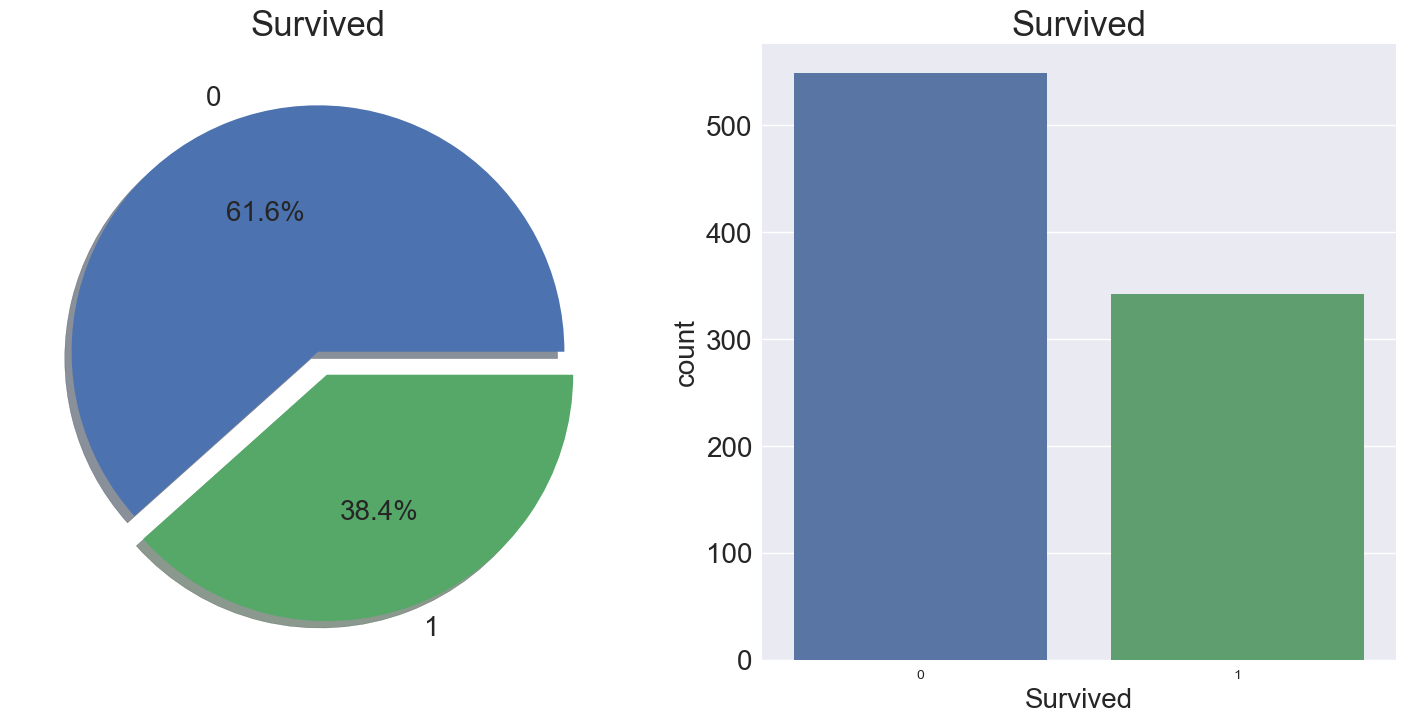

In [60]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 파이차트
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], ## Survived 0은 중심에서 0%먼큼, 1은 중심에서 10%만큼 벗어나게
                                         autopct='%1.1f%%', ## 백분율을 소수점 앞 한자리 소수점 아래 한자리까지 %로 표시
                                         ax=ax[0], ## 0번째 위치
                                         shadow=True, ## 그림자 표시
                                         fontsize=20)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# 카운트플랏
sns.countplot(x='Survived', data=data, ax=ax[1]) ## data = 그래프로 나타내기 위한 데이터셋
ax[1].set_title('Survived')

plt.show()

- 살아남지 못한 승객의 수(0)가 살아남은 승객의 수(1)보다 많습니다.

- 총 891명의 승객들 중, 오직 350명(38.4%)만이 살아남았습니다.

- 더 자세한 정보를 얻기 위해 생존한 승객과 그렇지 못한 승객의 특징을 확인할 필요가 있습니다.  

- 데이터 셋의 feature들을 하나씩 분석해보며 이를 확인해보겠습니다.

### 생존자의 성별 확인 [Survived/Sex]

In [61]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [62]:
data.groupby(['Survived', 'Sex'])['Sex'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

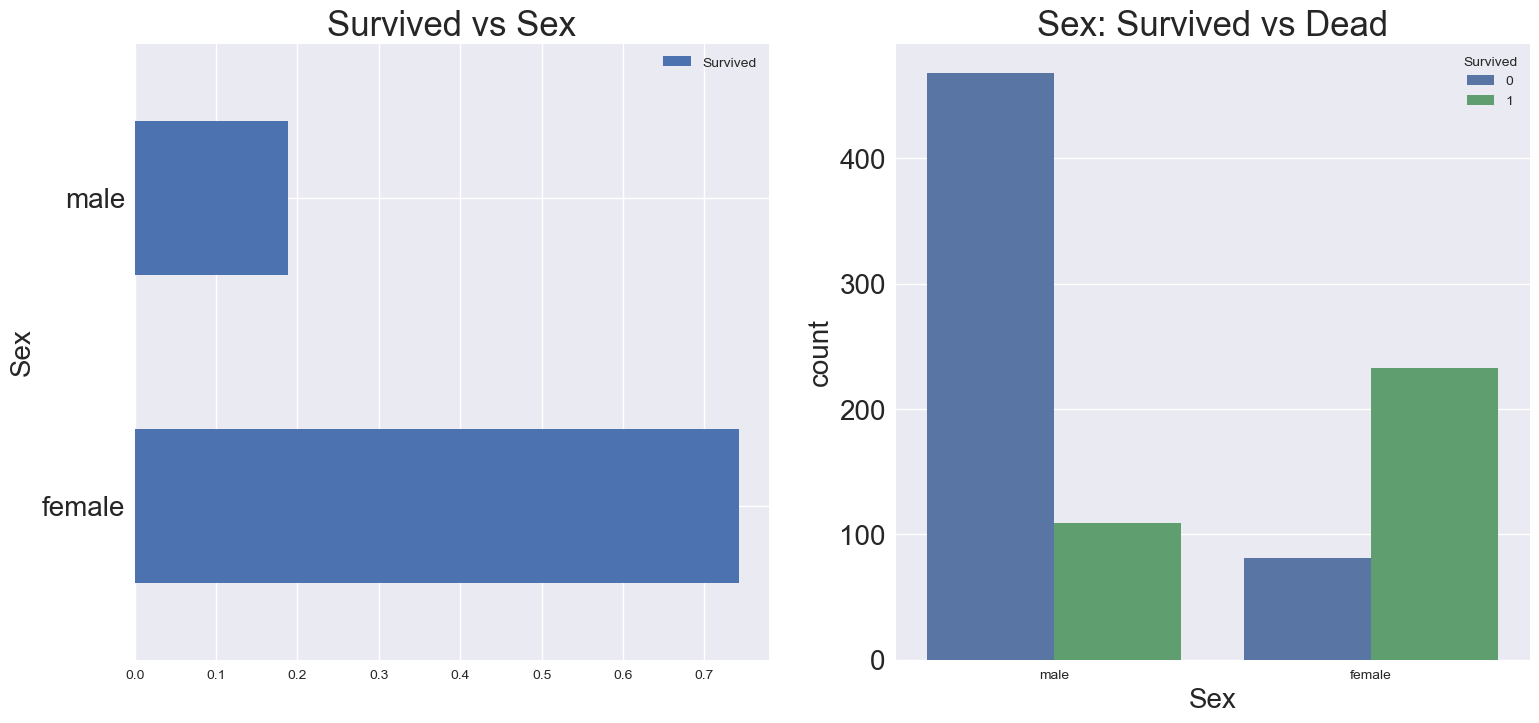

In [63]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 막대 그래프
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.barh(ax=ax[0]) ## 성별 탑승객 수를 수평 막대그래프로 시각화
                                                                      ## barh(가로형 막대 그래프)
ax[0].set_title('Survived vs Sex') ## 그래프 위치설정, 0번째 row, 0번쨰 col 

# 카운트 플랏
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])  ## x축을 성별로 변경
                                                             ## hue 파라미터 값을 활용해서 생존 여부에 따라 다른 색으로 표시
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

- 탑승객의 전체 성별 통계를 확인했을 때 남성이 577명, 여성이 314명으로 남성이 더 많습니다.  
- 왼쪽 그래프를 통해 생존한 사람은 여성이 남성에 비해 두 배 이상 많음을 확인할 수 있습니다.  
- 여성의 생존율은 약 75%인 반면 남성은 18-19% 입니다.  

### 결과를 해석할 때 주의할 점

통계에는 인과관계와 상관관계라는 개념이 있습니다. __인과관계__는 '원인과 결과'의 관계로, 원인에 따라 반드시 결과가 나타나기 때문에 시간관계라고도 불립니다. __상관관계__는 '두 변수 간에 일정한 관계가 있음'을 뜻합니다. x의 변화에 따라 y가 증가하거나 감소하는 변화를 상관관계라고 합니다. 증가할 때를 양의 상관관계, 감소할 때를 음의 상관관계라고 하며 상관관계에는 그 정도를 나타내는 상관계수가 있습니다. 상관계수의 절댓값이 클수록 높은 상관관계를 보인다고 해석할 수 있습니다. 우리는 상관관계를 종종 인과관계로 잘못 해석하므로, 이를 주의해야합니다.  

대표적인 예시로 아이스크림의 판매량 증가와 상어 습격의 증가는 서로 상관관계에 있습니다. 더운 날씨에 바닷가를 찾는 사람이 많고, 동시에 아이스크림의 소비량도 늘어나는 것입니다. 두 사건은 서로 상관관계가 있지만 '아이스크림 판매량이 늘어날 수록 상어에 공격당하는 횟수가 늘어난다'고 해석하는 것은 오류입니다. 따라서 우리는 결과를 해석할 때 상관관계와 인과관계의 차이를 구분해야 합니다.

![Causation vs Correlation](https://pdsi.pabii.com/wp-content/uploads/cause-effect-difference-correlation-causation-explained-768x580.jpg)

따라서 위의 타이타닉 통계를 보고 남성이라서 '많이 죽고', 여성이라서 '많이 살아남는다' 라고 해석하기엔 한계가 있습니다.  
더 명확한 인사이트를 도출하기 위해서는 이들을 연결해주거나 보충하는 연결다리를 찾아야 합니다.

## 등급 확인 [Pclass]

### 크로스탭(Cross-tabulation)

- 두 개 이상의 범주형 변수 간의 관계를 이해하고 시각화하기 위해 사용되는 통계적인 도구  
- 범주형 변수들 간의 교차 빈도를 나타내며, 변수 간의 연관성이나 패턴을 파악할 수 있음  

### 등급별 생존자의 수 확인 [Pclass/Survived]

In [64]:
#크로스태블릿
pd.crosstab(data.Pclass,
            data.Survived, margins=True) ## margins=True => 각 행과 열의 총합을 나타내는 "All" 열과 행이 추가

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


표만 확인했을 때는 분포를 한눈에 파악하기 어려우므로 막대 그래프 시각화 진행

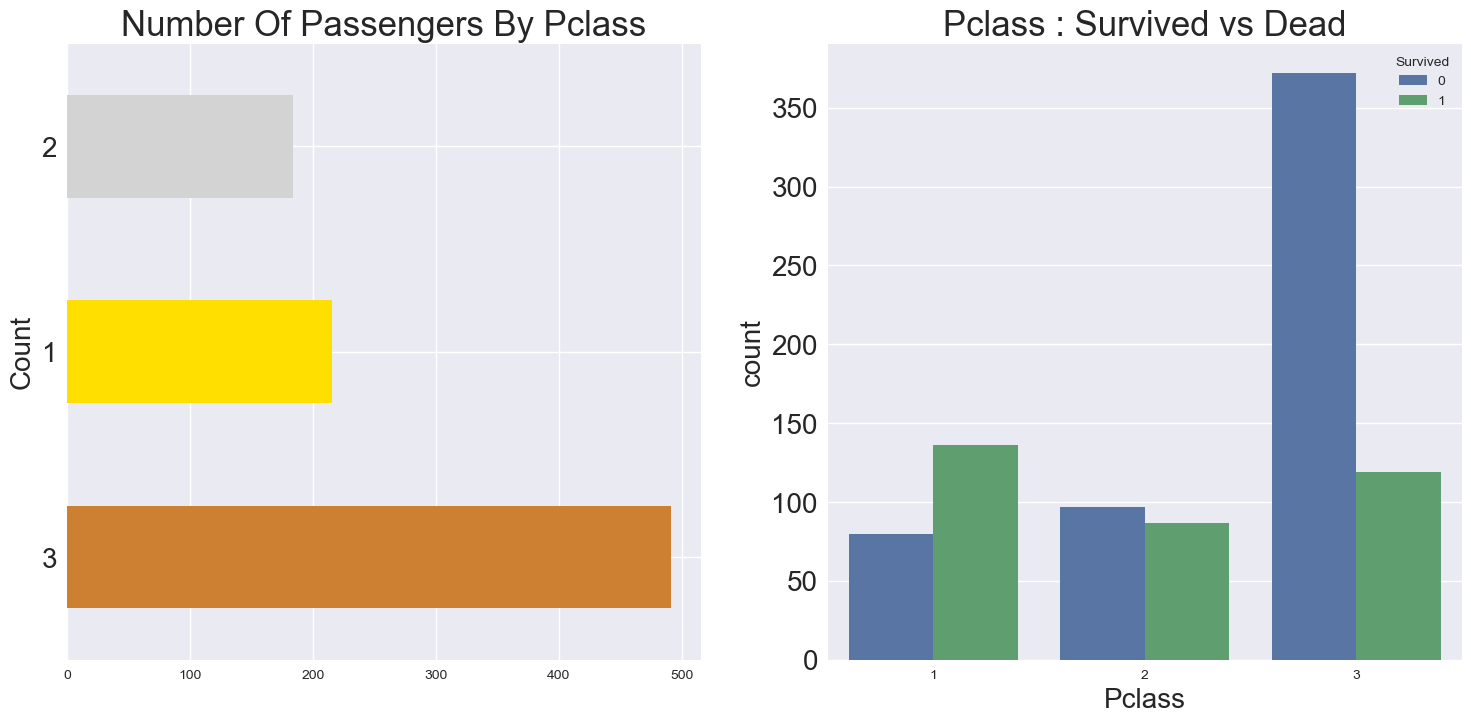

In [65]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 가로형 막대 그래프: barh
data['Pclass'].value_counts().plot.barh(
    color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0]) ## Pclass별 탑승객 수, color 지정
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# 카운트 플랏
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])## Pclass별 Survived를 나눠 시각화
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

- Pclass의 분포를 확인했을 때 3등급인 승객의 수가 가장 많고, 1등급, 2등급 순으로 탑승객이 많았습니다.  
- Pclass별 탑승객의 생존 여부를 확인했을 때, 사망자 수는 3등급이 제일 많고 생존자 수는 1등급 탑승객이 가장 많았습니다.  
- Pclass 3등급에 가장 많은 탑승객이 있었지만, 그에 비해 생존자들의 수는 매우 적음을 통해 3등급 탑승객은 구조에서 후순위였음을 알 수 있습니다.  
- 1등급의 생존율은 약 63%, 2등급의 생존율을 약 48%이며 3등급은 약 25% 정도 입니다.  .

### 성별과 등급, 생존 여부 확인 [Sex/Pclass/Survived]

In [66]:
# 크로스탭으로 표현
pd.crosstab([data.Sex, data.Survived], data.Pclass,
            margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

### 캣 플롯(catplot)

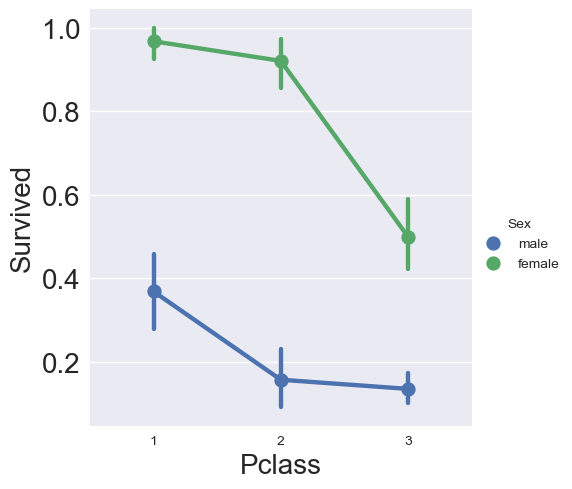

In [67]:
# catplot으로 선 그래프로 시각화
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point') ## kind = 생성하고자 하는 플롯의 종류를 지정
plt.show()

- __catplot__은 범주형 변수들을 분리하여 표현하기에 용이합니다.  
- 위의 그래프에서 y값은 생존 여부의 평균으로 계산되므로 y는 Pclass와 Sex별 생존율이라고 할 수 있습니다.  
- 전체적으로 여성의 생존율이 남성보다 높으며, 1등급 여성의 생존율이 가장 높고 3등급 남성의 생존율이 가장 낮습니다. 

## 나이 분포확인 [Age]

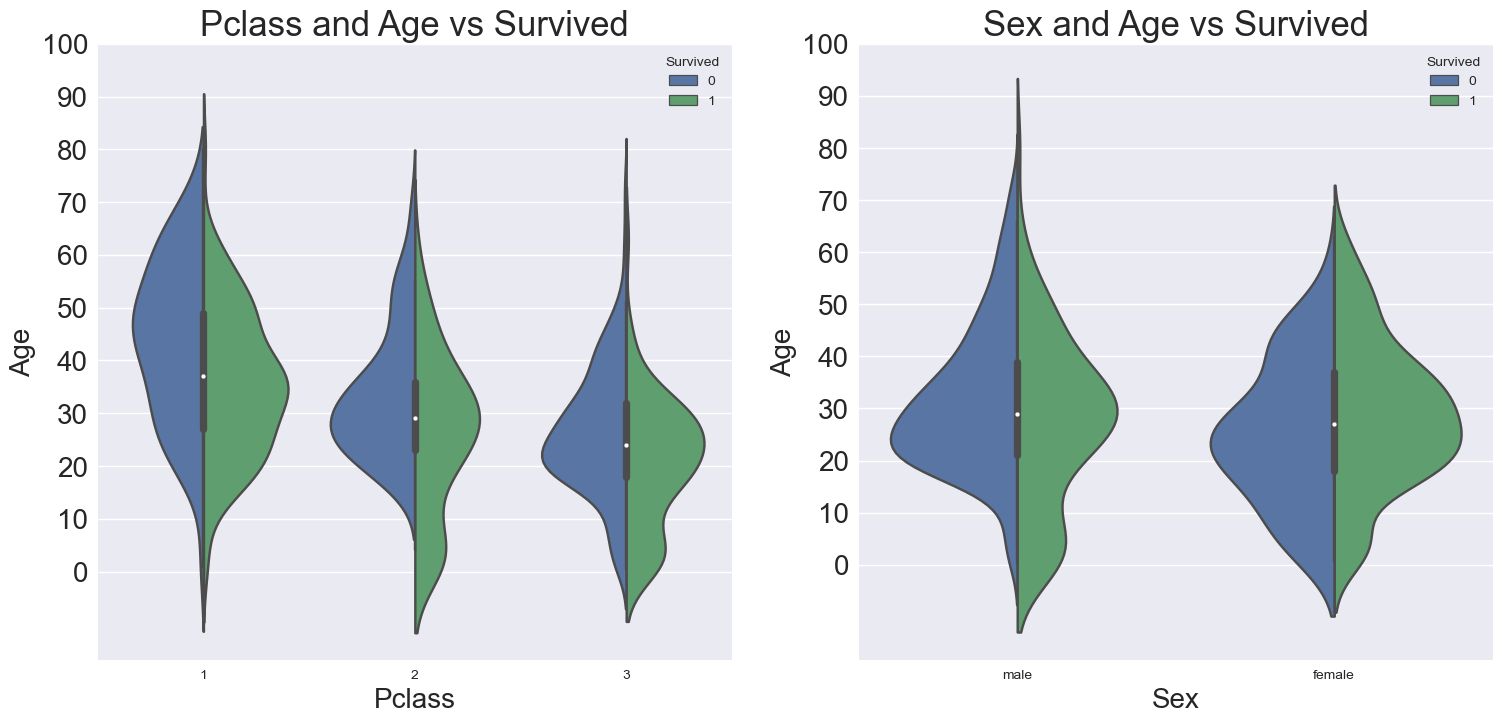

In [68]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 첫 번째 바이올린 플랏
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10)) # 0부터 100까지 10단위로 y축 표시

# 두 번째 바이올린 플랏
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

- Pclass가 낮아질수록, 아이들의 수가 증가하며, 10살 이하 승객들의 생존율은 Pclass와 상관없이 높습니다.
- 1등급에서는 20-50살 승객들의 생존율이 높은 반면, 2등급에서는 20-50살 승객들의 사망률이 높습니다. 
- 성별로 나눠 확인했을 때 남성은 나이가 많을수록 생존율이 떨어짐을 확인할 수 있습니다.

### 나이 [Age] 결측값 채우기

In [69]:
#결측값 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

위에서 언급했듯이, Age 컬럼에는 177개의 결측값이 존재합니다.  
결측치를 단순히 평균 나이로 대체하기엔 사람들의 나이대가 매우 다양하다는 문제가 있습니다.  
데이터 셋에 있는 __'Name'__ 컬럼에는 Mr, Mrs와 같은 호칭(Salutation)이 있습니다.  
이 호칭을 기준으로 그룹을 나누고, 각 그룹의 평균으로 결측치를 대체하는 방법을 활용해보겠습니다.

In [70]:
data[['Name']]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [71]:
data['Initial'] = 0 # initial 컬럼을 만들고 일시적으로 값을 0으로 초기화
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')  # Name 컬럼에서 .(dot)을 기준으로 알파벳 문자열 추출

In [72]:
data[['Initial']]

,Initial
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [73]:
# Initial을 Sex와 함께 확인
pd.crosstab(data.Sex, data.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle와 Mme같이 잘못 표기된 Initial들이 보입니다.  
이를 Miss 또는 유추 가능한 값들로 대체하고, 흔하지 않은 Initial들은 Other로 대체하겠습니다.

In [74]:
data['Initial'].replace([
    'Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
    'Rev', 'Capt', 'Sir', 'Don'
], [
    'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
    'Other', 'Mr', 'Mr', 'Mr'
],
                        inplace=True)

In [75]:
# Initial별 평균 나이 확인
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Initial 컬럼의 값들을 간단하게 설명하면,  

__Master__ - Mr라고 부르기에 너무 어린 남성을 일컫는 말  
__Miss__ - 여성의 성과 함께 사용, 미혼 여성을 일컫는 말  
__Mr__ - 남성의 성과 함께 사용, 결혼 여부와 관계 없이 모든 남성을 일컫는 말  
__Mrs__ - 여성의 성과 함께 사용, 기혼 여성을 일컫는 말

In [76]:
# 결측값을 Initial별 평균값으로 대체
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [77]:
# 결측값 유무 확인
data.Age.isnull().any()

False

결측값의 유무가 False로 나타났기 때문에, Age 컬럼에는 더 이상 결측값이 존재하지 않습니다.  
모든 승객의 나이 정보가 입력되었으므로, 나이별 생존자의 수와 사망자의 수를 확인해보겠습니다. 

### 나이별 생존/사망자 수 확인하기 [Age/Survived]

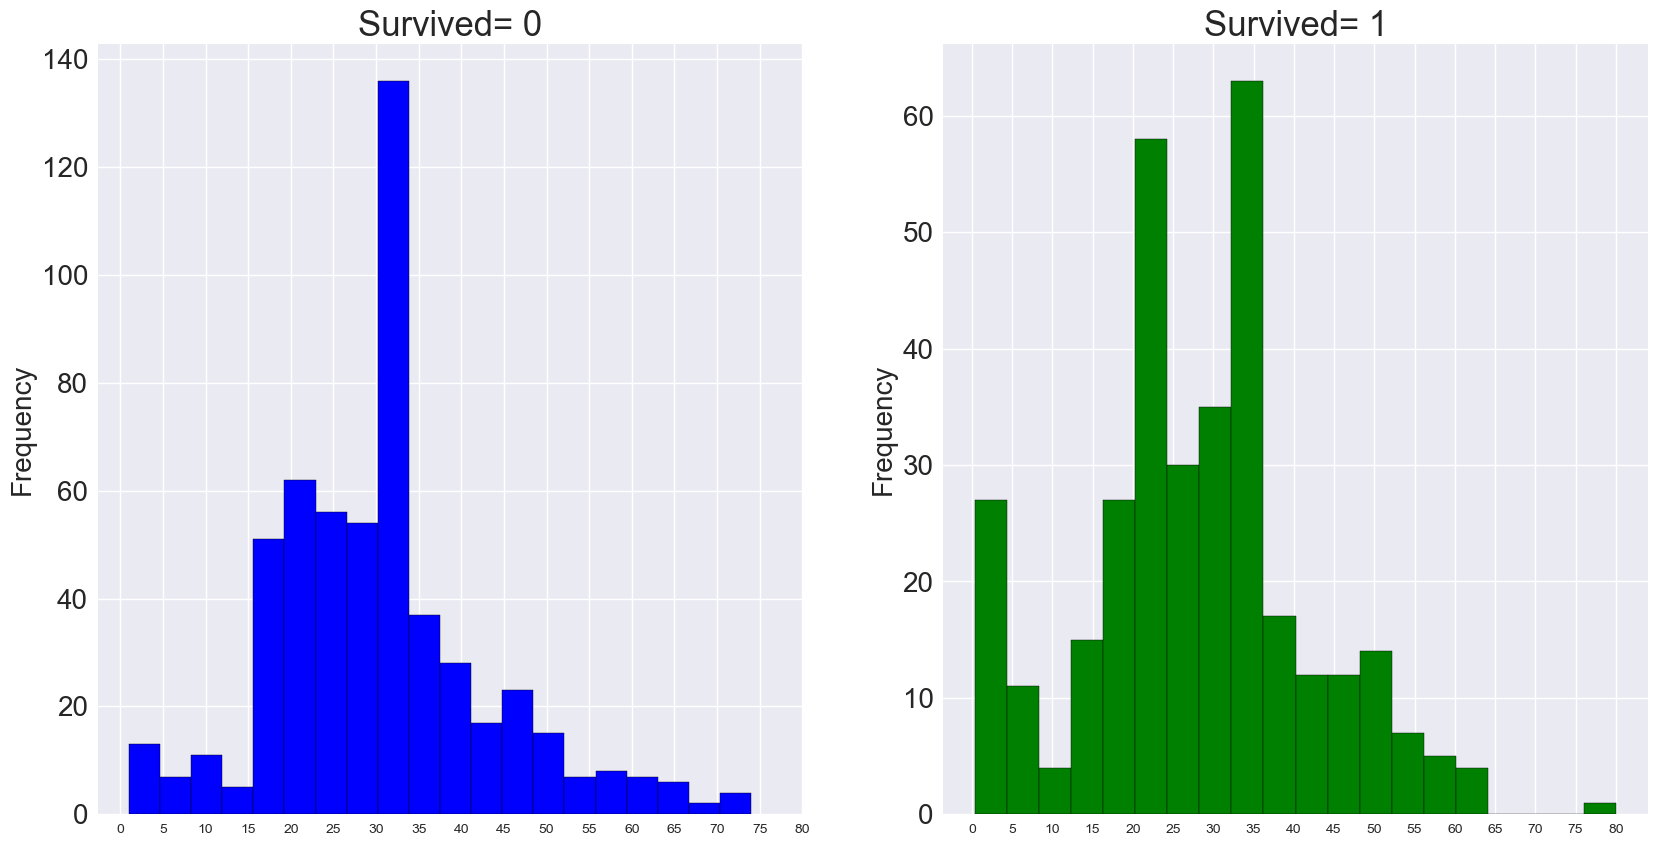

In [78]:
# Figure 객체와 서브플롯 생성
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# 첫 번째 그래프: 생존하지 못한 경우의 나이 분포 히스토그램
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0],
                                          bins=20,
                                          edgecolor='black',
                                          color='blue')
ax[0].set_title('Survived= 0')  # 제목 설정
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)  # x축 눈금 설정

# 두 번째 그래프: 생존한 경우의 나이 분포 히스토그램
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1],
                                          color='green',
                                          bins=20,
                                          edgecolor='black')
ax[1].set_title('Survived= 1')  # 제목 설정
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)  # x축 눈금 설정

plt.show()

- 5살 아래 어린이들이 많은 구조를 받았음을 확인할 수 있습니다.  
- 생존자 중 가장 나이가 많은 사람은 80살이며, 생존자와 사망자 모두 30-35세 인구가 가장 많습니다.

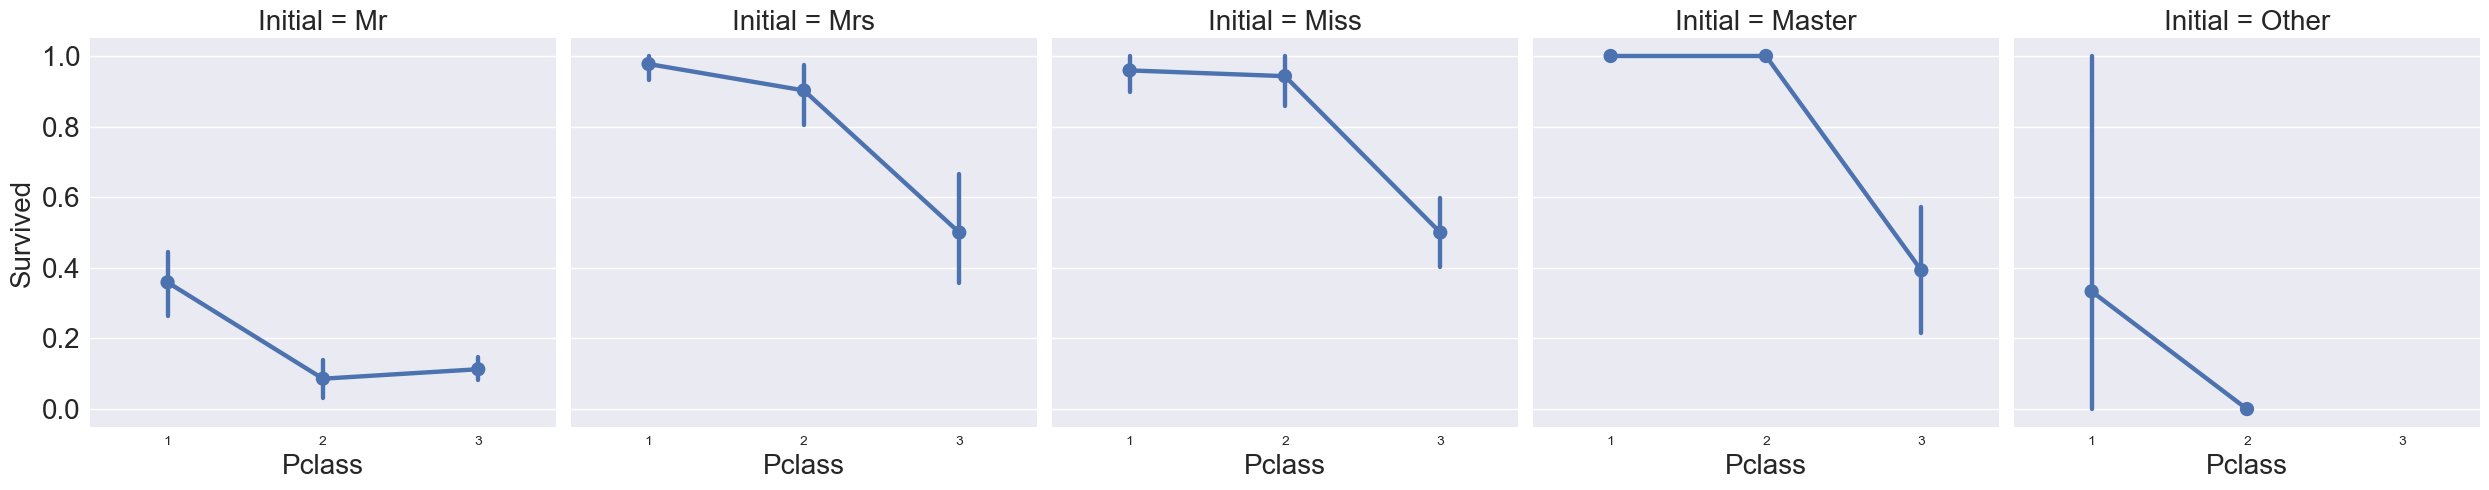

In [79]:
# Initial별 Pclass와 Survived를 비교하는 팩터 플롯 생성
sns.catplot(x='Pclass',      # x축에 Pclass 열 사용
            y='Survived',    # y축에 Survived 열 사용 (생존율)
            col='Initial',   # Initial 열의 값에 따라 여러 개의 열로 구분하여 그림
            kind='point',    # 종류: 선 그래프
            data=data)       # 사용할 데이터프레임 지정

plt.show()

- 생존율은 __Mrs__, __Mis__, __Master__에서 높은 것을 보아 여성과 어린 아이들이 많은 구조를 받았음을 알 수 있습니다.  
- 남성의 생존율이 낮은 편이며, 대체적으로 1등급 탑승객의 생존율이 높습니다.  

## 승선 항 확인 [Embarked]

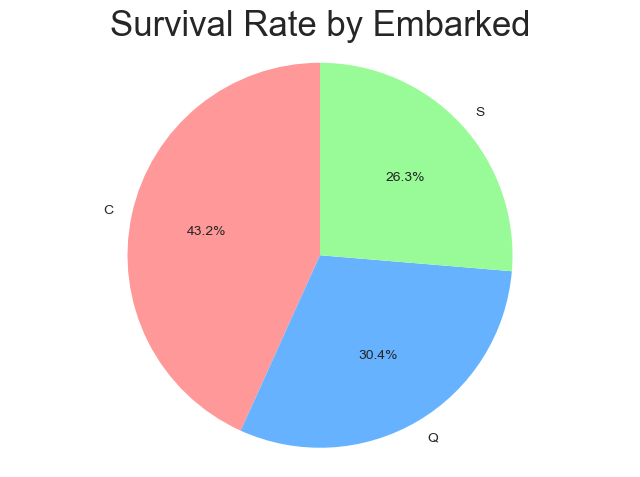

In [80]:
# 'Embarked' 열과 'Survived' 열을 사용하여 생존 여부에 따른 데이터의 백분율 계산
survived_percentage = data.groupby(['Embarked', 'Survived']).size().unstack().fillna(0)
survived_percentage['Total'] = survived_percentage.sum(axis=1)
survived_percentage['Survival Rate'] = (survived_percentage[1] / survived_percentage['Total']) * 100

# 파이 그래프 생성
labels = survived_percentage.index
colors = ['#FF9999', '#66B2FF', '#98FB98']
plt.pie(survived_percentage['Survival Rate'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 원을 원형으로 유지

# 그래프 제목 설정
plt.title('Survival Rate by Embarked')

# 그래프 표시
plt.show()

- C항구에서 탑승한 승객들의 생존률이 43.2%로 가장 높고, S항구에서 탑승한 승객들의 생존율이 36.3%로 가장 낮습니다.  
- 그 이유가 무엇인지 결측값을 확인하고, 처리한 뒤 추가적인 그래프 분석을 통해 확인해보겠습니다.  

### 승선 항 [Embarked] 결측값 채우기

In [81]:
#결측값 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

승선 항에 대한 데이터의 결측치는 2개입니다.  
가장 많은 사람들이 탑승한 항구를 확인하고, 결측치를 대체하겠습니다.

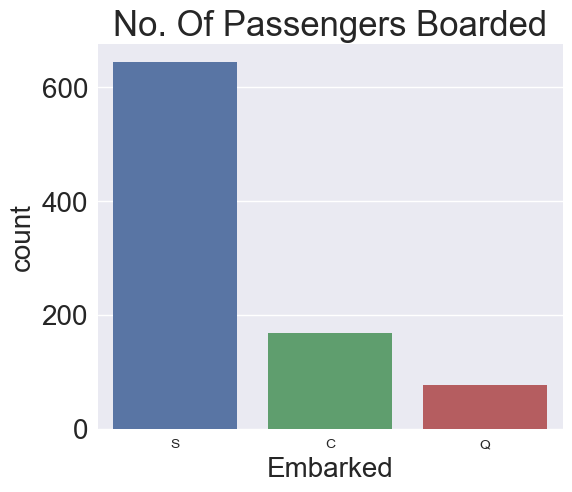

In [82]:
# 1x1 서브플롯 생성
f, ax = plt.subplots(1, 1, figsize=(6, 5))  # 크기를 조정합니다

# 'Embarked' 열을 사용하여 탑승 항구별 탑승자 수 카운트 플롯 생성
sns.countplot(x='Embarked', data=data, ax=ax)
ax.set_title('No. Of Passengers Boarded')  # 플롯 제목 설정

# 그래프 표시
plt.show()

가장 많은 사람들이 탑승한 항구는 __S__이므로, 결측치를 __S__로 대체합니다. 

In [83]:
data['Embarked'].fillna('S', inplace=True)

In [84]:
# 결측값 존재 유무 확인
data.Embarked.isnull().any()

False

### 승선항 별 그래프 시각화 [Embarked/Survived/Pclass/Sex]

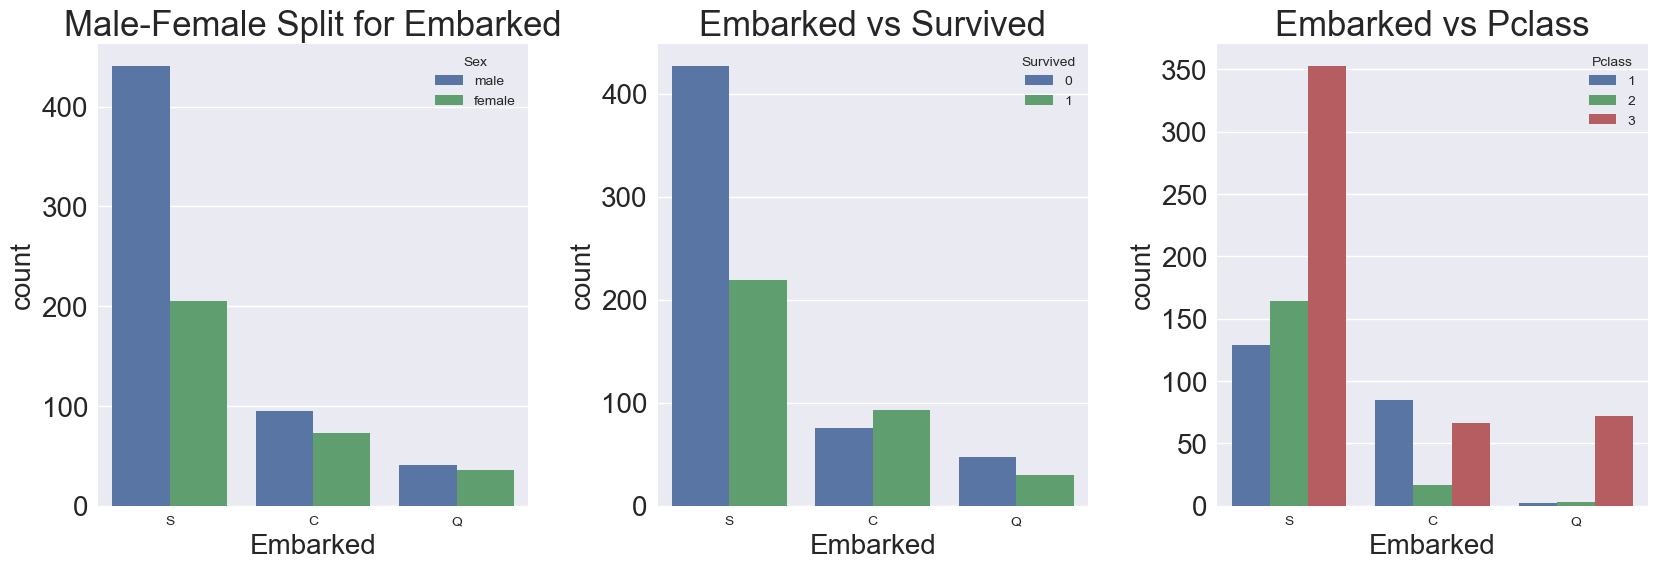

In [85]:
# 1x3 서브플롯 생성 (가로로 나란히)
f, ax = plt.subplots(1, 3, figsize=(20, 6))

# 첫 번째 카운트 플롯: 성별에 따른 탑승 항구별 탑승자 수 분포
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0])
ax[0].set_title('Male-Female Split for Embarked')

# 두 번째 카운트 플롯: 탑승 항구별 생존자 수와 비생존자 수 비교
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Embarked vs Survived')

# 세 번째 카운트 플롯: 탑승 항구별 Pclass 분포
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[2])
ax[2].set_title('Embarked vs Pclass')

# 서브플롯 간의 간격 조정
plt.subplots_adjust(wspace=0.3)

# 그래프 표시
plt.show()

- S 항구에 탑승한 승객들이 가장 많고, S 항구 탑승객들의 성별 비율은 남성이 여성의 약 2배입니다.  
- 위의 파이차트에서 S 항구 승객들의 생존율이 가장 낮다는 사실과 연결지었을 때, 구조가 늦어진 남성들이 많았기 때문이라고 유추할 수 있습니다.  
- 또한 S 항구에서 탑승한 대다수의 사람들은 3등급이었으므로, 1등급 탑승자의 비율이 높은 C 항구와 비교했을 때 생존율이 낮았다고 판단할 수 있습니다.  
- Q 항구의 95%는 3등급 승객입니다.  

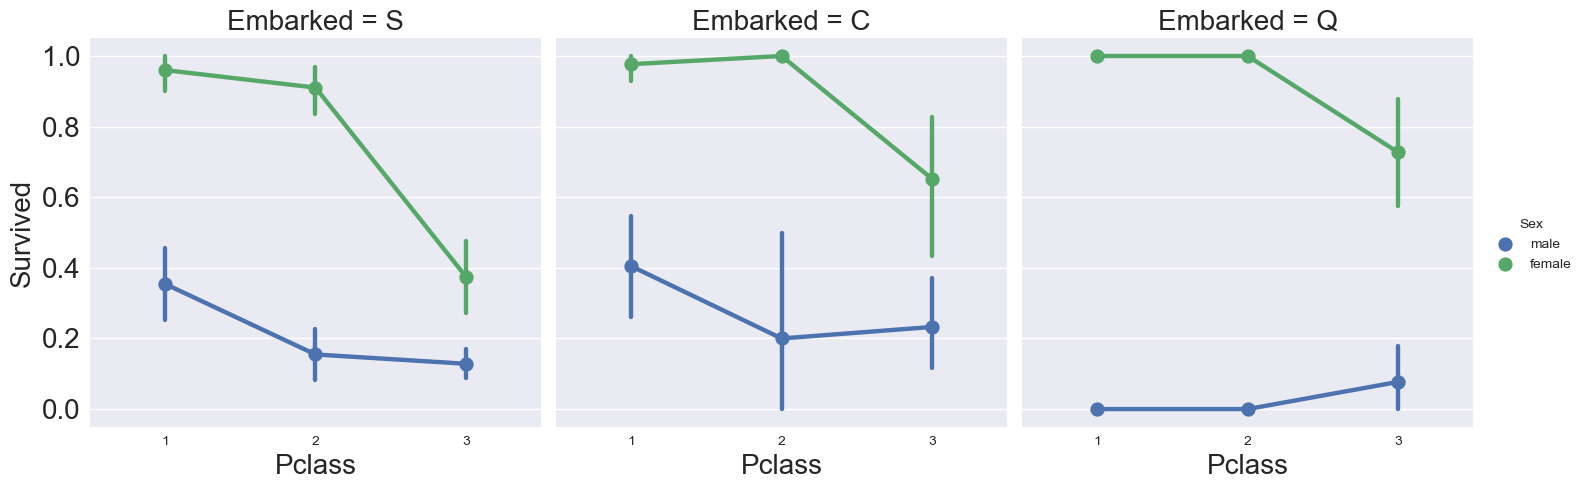

In [86]:
# 팩터 플롯으로 시각화
sns.catplot(x='Pclass',        # x축에 'Pclass' 열 사용
            y='Survived',      # y축에 'Survived' 열 사용 (생존율)
            hue='Sex',         # 성별에 따라 색상 분류
            col='Embarked',    # 'Embarked' 열의 값에 따라 여러 개의 열로 구분하여 그림
            kind='point',      # 종류: 선 그래프
            data=data)         # 사용할 데이터프레임 지정

# 그래프 표시
plt.show()

- 여성들은 남성에 비해 탑승 항과 등급에 상관 없이 생존율이 높습니다.  
- 1등급과 2등급에 탑승한 여성 승객은 거의 대다수가 살아남았습니다.  
- S 항구에서 탑승한 여성과 남성 승객은 모두 생존율이 낮은 편입니다.  
- Q 항구에서 탑승한 남성 승객은 생존을이 매우 낮으며, 그들은 대부분 3등급 승객입니다. 

## 함께 탑승한 형제/배우자의 수 확인 [SibSp]

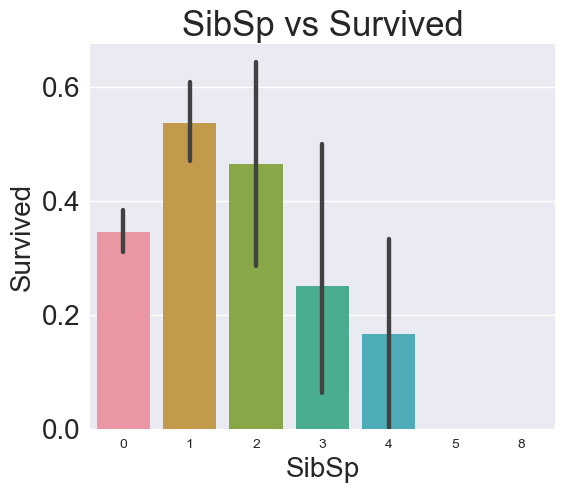

In [87]:
# 1x1 서브플롯 생성
f, ax = plt.subplots(1, 1, figsize=(6, 5))  # 크기를 조정합니다
sns.barplot(x='SibSp', y='Survived', data=data)
plt.title('SibSp vs Survived')
plt.show()

In [88]:
pd.crosstab(data.SibSp, data.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 함께 탑승한 형제나 배우자의 수가 증가할 수록 낮은 생존율을 보입니다.  
- 5명에서 8명인 가족의 생존율은 0이며, 그 이유는 Pclass를 통해 확인할 수 있습니다.  
- SibSp의 수가 4,5,8인 탑승객은 3등급 자리에 탑승했습니다.  
- 3등급 탑승객이 구조에서 후순위였기 때문에 3등급에 탑승한 대가족은 거의 생존하지 못했다고 판단할 수 있습니다.

## 함께 탑승한 부모/자식의 수 확인 [Parch/Survived]

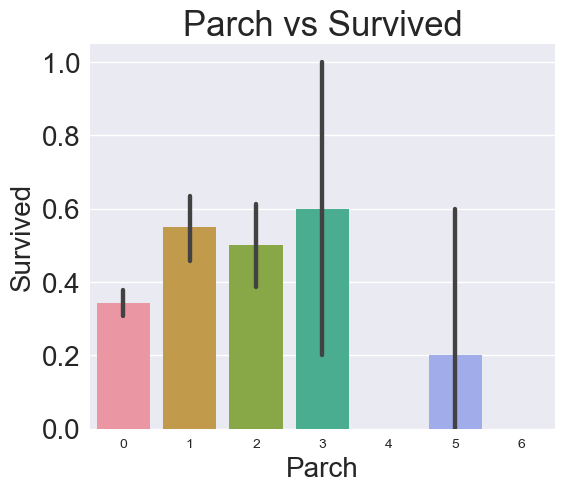

In [89]:
# 1x1 서브플롯 생성
f, ax = plt.subplots(1, 1, figsize=(6, 5))  # 크기를 조정합니다
sns.barplot(x='Parch', y='Survived', data=data)
plt.title('Parch vs Survived')
plt.show()

- 부모, 자식과 함께 탑승한 경우 그렇지 않은 승객들에 비해 높은 생존율을 보이나, 수가 3명을 넘어가면 생존율은 감소합니다.  
- 1-3명의 부모, 자식과 함께 탑승한 사람들의 생존율이 높은 편입니다.  

## 요금 확인 [Fare]

In [90]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


- 탑승객이 지불한 탑승 요금 중 가장 높은 값과 낮은 값의 수치입니다.  
- 낮은 금액이 0인 것으로 보아 돈을 내지 않고 탑승한 승객도 있음을 확인할 수 있습니다.

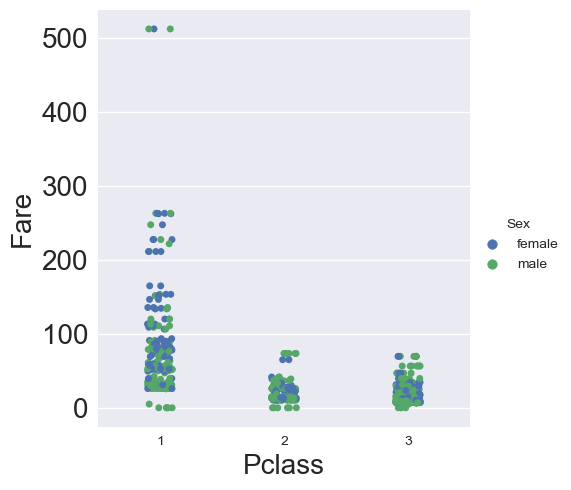

In [91]:
sns.catplot(x='Pclass', y='Fare', hue='Sex', data=data)

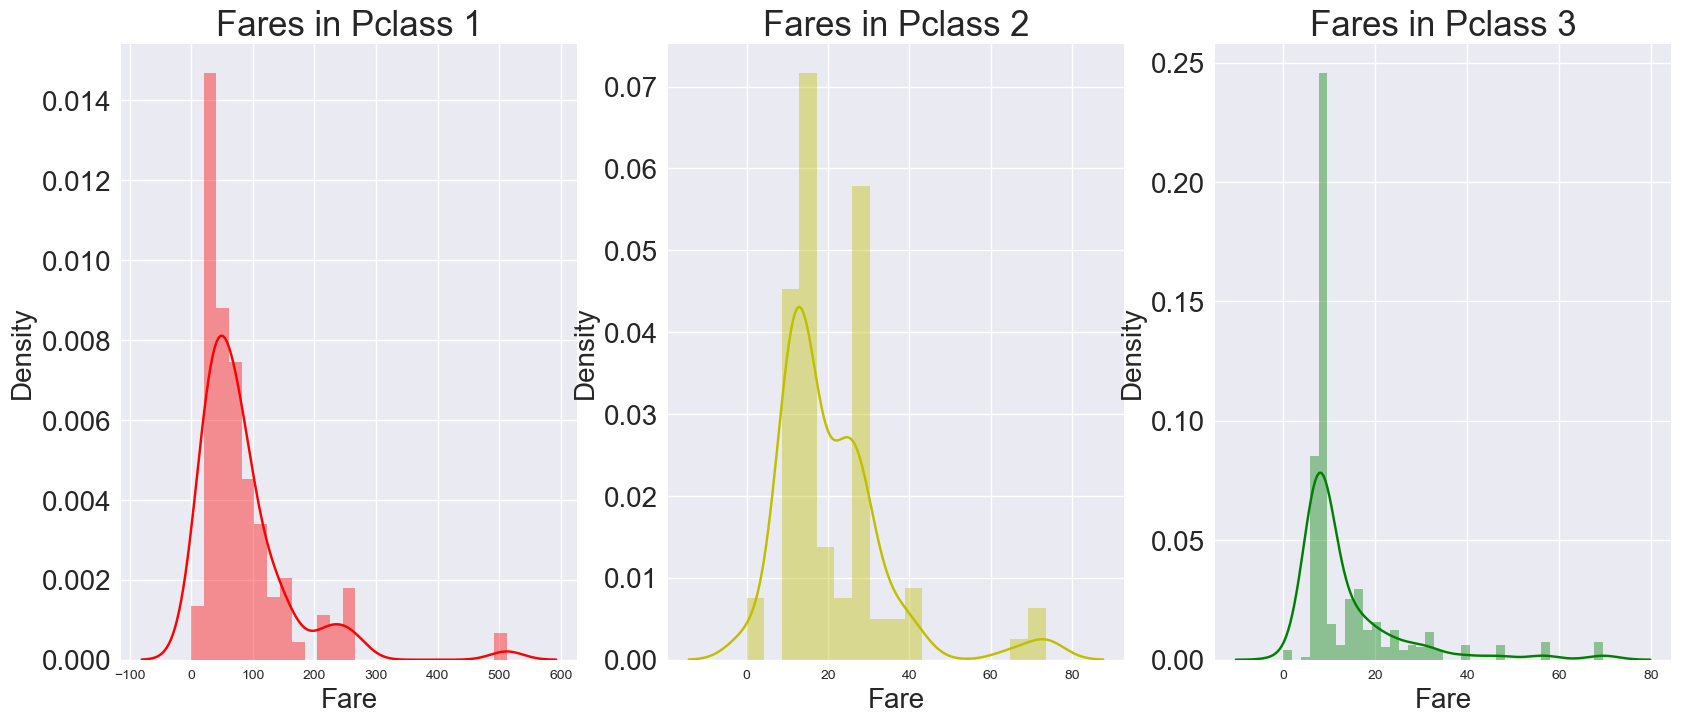

In [92]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# dist plot

sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0], color='r')
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1], color='y')
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2], color='g')
ax[2].set_title('Fares in Pclass 3')

plt.show()

- __Displot__ 그래프는 히스토그램과 커널 밀도 추정 그래프를 조합한 형태로 데이터의 분포를 살펴볼 때 유용하게 사용할 수 있습니다.  
- 등급이 높을수록 요금이 비싸고, 같은 등급이라고 하더라도 요금이 다양한다는 것을 확인할 수 있습니다.  

# 분석 결과 정리

__Sex__ : 남자보다 여자의 생존율이 높습니다.

__Pclass__ : 다른 등급에 비해 1등급의 생존율이 높으며, 구조의 기회를 먼저 가졌음을 예상할 수 있습니다.  

__Age__ : 5-10살 아래의 아이들의 생존율이 높습니다. 15-35살의 탑승객들이 많이 사망했습니다.

__Embarked__ : 1등급 탑승객이 대부분 S항구에서 탑승하였음에도, C항구에서 탑승한 사람들의 생존율이 더 높습니다. Q항구의 탑승객은 모두 3등급입니다.  

__Parch,SibSp__ : 1-2명의 형제, 배우자 또는 1-3명의 부모ㆍ자녀와 탑승한 사람들의 생존율이 혼자 타거나 가족이 많은 사람들보다 생존율이 높습니다.

# 변수 간 상관관계 확인 (Heatmap)

데이터 변수 간의 상관관계를 확인할 때는 __Heatmap__을 사용합니다.  
행렬 형태의 데이터를 색상을 이용하여 나타내는 방식으로, 데이터가 어떤 패턴이 있는지를 빠르게 파악하고 이해하는 데 도움을 줍니다.  
상관관계를 확인하기 위해서는 숫자형 데이터여야 하므로, 문자열인 [Name]행을 제외하고 히트맵을 그려보겠습니다.  

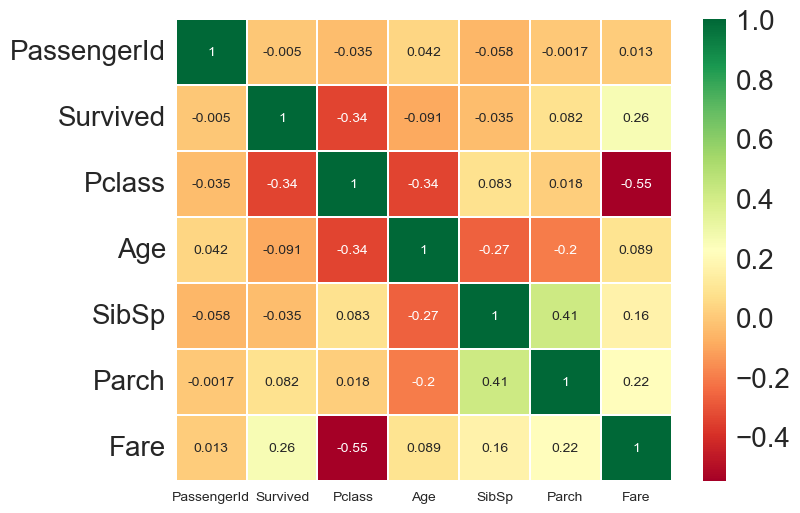

In [93]:
numeric_data = data.select_dtypes(include=[np.number])  # 숫자형 데이터만 선택
correlation_matrix = numeric_data.corr()  # 숫자형 데이터의 상관관계 행렬 계산

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

- 상관관계는 두 변수 간의 관련성을 측정하는 통계적 지표로, -1부터 1까지의 범위에서 나타나며 0.7 이상부터 '강한 상관관계'로 해석합니다. 
- 두 변수의 상관관계가 매우 높다는 것은 두 변수가 거의 동일한 정보를 갖고 있다는 것을 뜻합니다.  
- 그러나 상관관계가 높다고 해서 반드시 인과관계가 있는 것은 아니므로, 추가적인 분석이 필요한 경우가 많습니다.  
- 위에서는 그리 높은 상관관계가 존재하지 않으며, 가장 높은 상관계수는 __SibSp과 Parch (0.41)__ 입니다.  

# Feature Engineering & Data Cleaning

우리가 사용한 타이타닉 데이터는 일반적으로 생존자 예측 모델을 제작하기 위한 예제로 많이 사용됩니다.  
__Feature Engineering__이란, 초기 데이터에서 특징을 가공하고 생산하여 모델의 입력 데이터를 생성하는 과정을 말합니다.  
__Data Cleaning__은 데이터셋 내에 존재하는 오류, 결측치, 이상치 등을 정리하고 처리하는 작업을 말합니다.  
두 과정은 모델의 성능에 미치는 영향은 매우 크기 때문에, EDA에서 굉장히 중요한 부분이라고 할 수 있습니다.  
문자보다는 숫자, 개별값보다는 범위로 구분하도록 데이터를 가공하는 것이 좋습니다.

## 나이 구간 나누기 [Age]

__Age__는 연속형 변수인데, 연속형 변수는 모델링을 할 때 문제가 있습니다.  
30명의 사람이 있다면 30개의 개별 나이들이 존재하는 문제가 생기므로, Binning 또는 Normalization을 활용하여 범주형 값으로 바꾸는 것이 좋습니다.  
이번에는 Binning을 통해 Age 컬럼을 범주형 값으로 바꾸도록 하겠습니다.

가장 나이가 많은 탑승객이 80세이므로, 0부터 80까지의 나이을 5개의 범주로 나누면 사이즈가 16인 bin(구간)이 5개 생깁니다.  

In [94]:
# Age_bin 컬럼 생성
data['Age_bin'] = 0
data.loc[data['Age'] <= 16, 'Age_bin'] = 0 # 16세 이하
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_bin'] = 1 # 17-32세
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_bin'] = 2 # 33-48세
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_bin'] = 3 # 49-64세
data.loc[data['Age'] > 64, 'Age_bin'] = 4 # 65세 이상
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [95]:
# 각 구간의 탑승객 수 확인
data['Age_bin'].value_counts().to_frame()

,Age_bin
1,382
2,325
0,104
3,69
4,11


- 1번 구간 (17-32세)에 속하는 사람들이 가장 많고, 4번 구간 (65세 이상)에 속하는 사람들이 가장 적습니다.

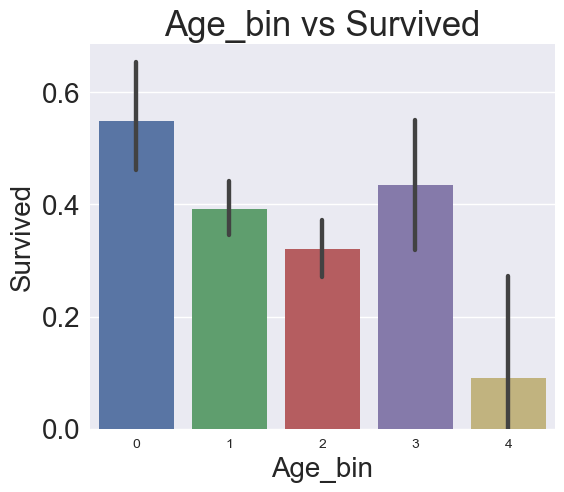

In [96]:
f, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.barplot(x='Age_bin', y='Survived', data=data)
plt.title('Age_bin vs Survived')
plt.show()

- __Age__ 컬럼 분석에서 확인했듯이 나이가 어린 0번 구간의 생존율이 가장 높고, 나이가 많은 4번 구간의 생존율이 가장 낮습니다.

## 동반 탑승객 정보 활용 [Parch/SibSp]

__Parch__ 컬럼과 __SibSp__ 컬럼은 모두 동반 탑승객의 정보를 담고 있습니다.  
비슷한 정보를 담고 있는 컬럼이 두 개이므로, 둘을 합쳐 __"Family_size"__와 __"Alone"__ 컬럼으로 구분하겠습니다. 

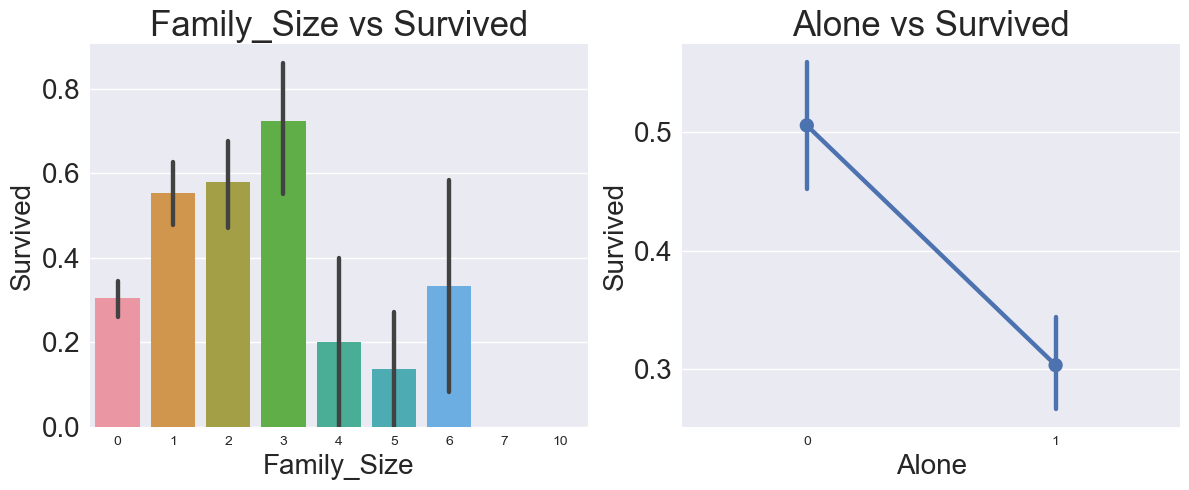

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

data['Family_Size'] = data['Parch'] + data['SibSp']  # 가족 크기 계산
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1  # 혼자인 사람

sns.barplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])  # sns.pointplot() 사용
ax[1].set_title('Alone vs Survived')

plt.tight_layout()  # 그래프 간격 조정
plt.show()

- Family_Size가 0일 때, 탑승객은 Alone에 해당되므로 Alone = 1 입니다.  
- Alone 일 때 생존율이 매우 낮으며, Family_size가 4 이상일 때도, 생존율은 감소합니다.  
- 이는 모델링 시 중요한 점으로 적용될 것 같습니다.

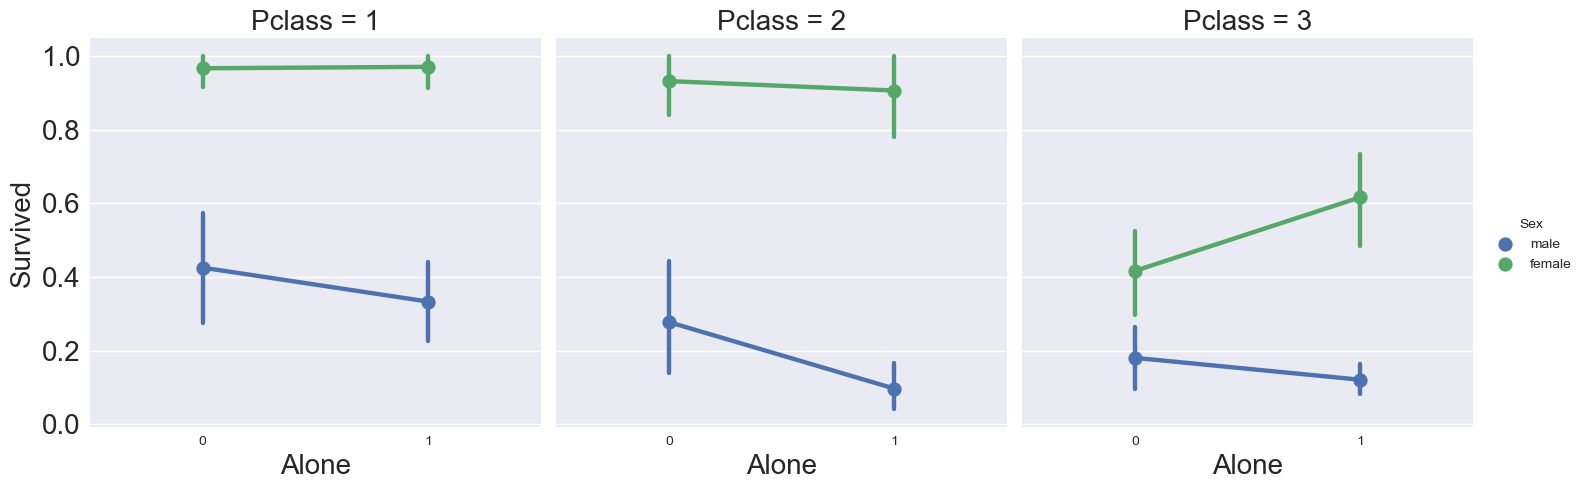

In [98]:
sns.catplot(x='Alone', y='Survived', data=data, kind='point', hue='Sex', col='Pclass')
plt.show()

- 혼자인 것은 성별과 등급에 상관없이 생존율에 영향을 미치며, 대부분 혼자일 때 낮은 생존율을 보입니다.  
- 다만 예외적으로 3등급에 탑승한 여성의 경우, 혼자일 때 더 높은 생존율을 보입니다.  

## 탑승 요금 구간 나누기 [Fare]

탑승 요금 역시 연속형 변수이므로, 모델에 적용하기 전 변화하는 것이 좋습니다.  
__pandas.qcut__을 사용하여 구간을 나눌 수 있으며, 나눠준 기준을 바탕으로 구간을 나눠보겠습니다.  

In [99]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4) # 네 개로 나누기(동일한 크기의 버킷으로 분리)
data.groupby([
    'Fare_Range'
])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [100]:
data['Fare_bin'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_bin'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_bin'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_bin'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_bin'] = 3

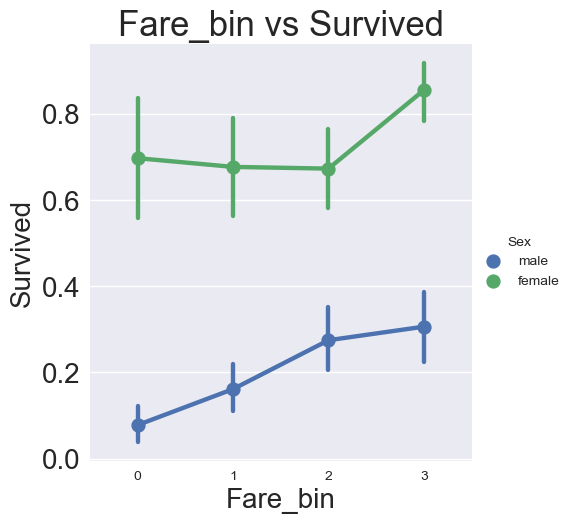

In [101]:
graph = sns.catplot(x='Fare_bin', y='Survived', data=data, kind='point', hue='Sex')
graph.set_axis_labels('Fare_bin', 'Survived')  # x축과 y축 라벨 설정
plt.title('Fare_bin vs Survived')  # 그래프 제목 설정
plt.show()

- __Fare_bin__이 증가할수록, 생존율 역시 증가합니다.  
- 높은 탑승 요금을 지불할수록 (높은 등급 승객일수록) 높은 생존율을 보입니다.  

## 수치형 변수로 변경하기 [Sex/Embarked/Initial]

앞서 언급했듯이 텍스트나 문자열, 연속형 변수는 수치형 데이터로 변환 후 모델에 적용하는 것이 좋습니다.  
유의미한 컬럼들 중 __String__ 변수를 __Numeric__ 값으로 변경하겠습니다.  

In [102]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],
                        [0, 1, 2, 3, 4],
                        inplace=True)

## 필요없는 컬럼들 제거하기

In [103]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_bin',
       'Family_Size', 'Alone', 'Fare_Range', 'Fare_bin'],
      dtype='object')

__Name__ - 범주형 값으로 변환할 수 없으므로, 불필요한 데이터입니다.

__Age__ - 구간으로 나눈 __Age_bin__ 컬럼이 있으므로, 불필요합니다.  

__Ticket__ - 분류가 불가능한 random string이므로 사용할 수 없습니다.

__Fare__ - 구간으로 나눈 __Fare_bin__ 컬럼이 있으므로, 불필요합니다.

__Cabin__ - 많은 결측치가 존재하고, 다수의 탑승객들이 여러 개의 cabin 값을 동시에 가지므로 사용할 수 없는 불필요한 feature입니다.

__Fare_Range__ - __Fare_bin__ 컬럼이 있으므로, 불필요합니다.

__PassengerId__ - 분류가 불가능하여 사용할 수 없습니다.

In [104]:
data.drop(
    ['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],
    axis=1,
    inplace=True)

# 실습

## 별 모양 안에 들어갈 알맞은 코드를 작성해서 두 개의 그래프를 시각화해주세요.

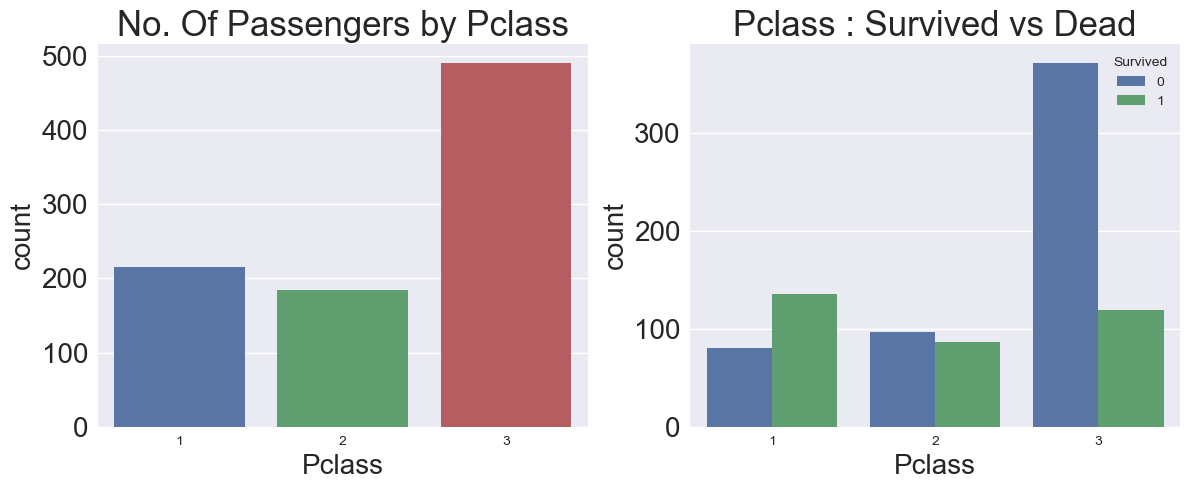

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 그래프 : 등급별 탑승자의 수
sns.countplot(x='Pclass', data=data, ax=ax[0])
ax[0].set_title('No. Of Passengers by Pclass')

# 두 번째 그래프 : 등급별 생존여부 시각화
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')

plt.tight_layout()
plt.show()

## 성별 별로 승선항에 따른 생존여부를 catplot을 통해 나타내주세요.

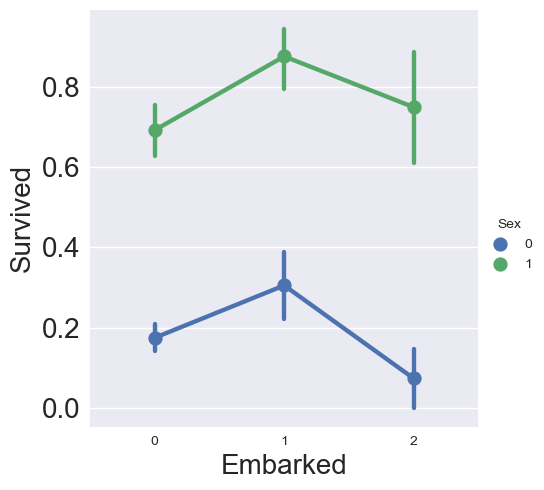

In [108]:
sns.catplot(x='Embarked', y='Survived', hue = 'Sex', data=data, kind='point')

plt.show()

## 아래의 히트맵을 보고 질문에 답해주세요.

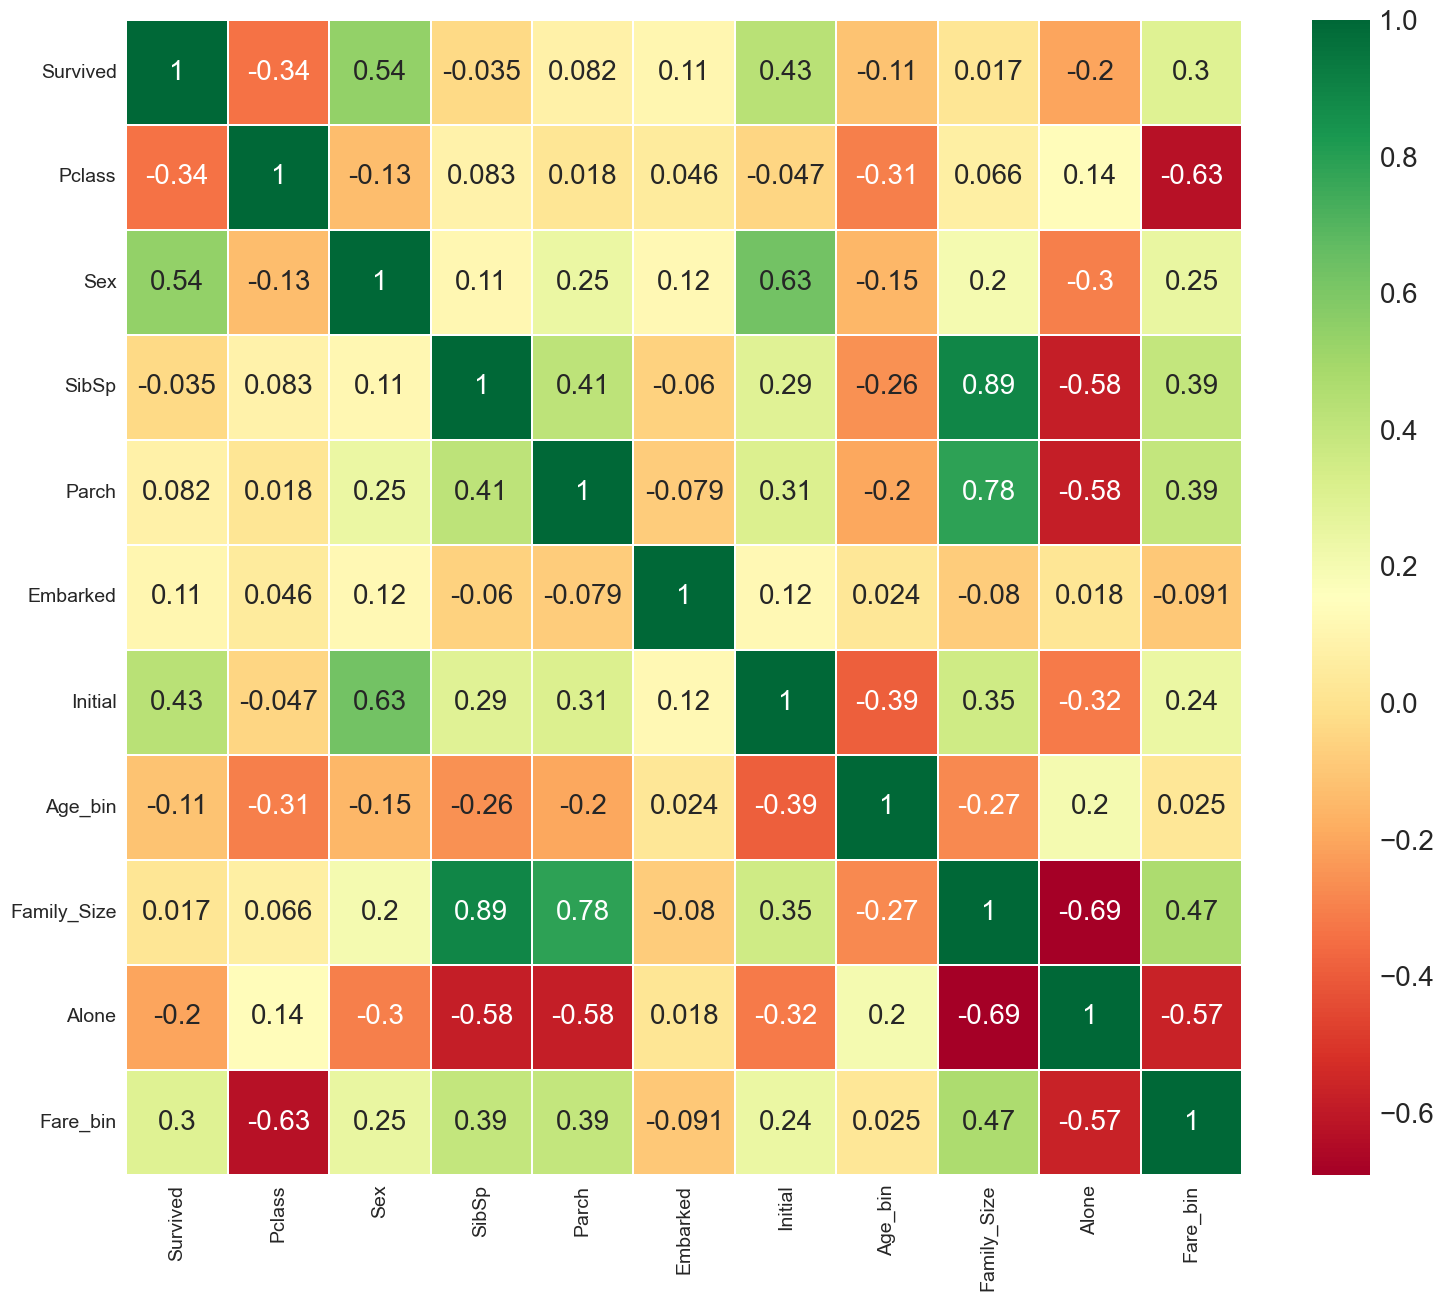

In [199]:
sns.heatmap(data.corr(),
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2,
            annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

__1. 가장 높은 상관관계를 보이는 두 컬럼은 무엇인가요?__  

정답 : 

__2. 그것이 의미하는 것은 무엇인가요?__  

정답 : 


In [ ]:
Family_Size - SibSp

In [ ]:
당연함. Family_Size가 SipSp의 정보로 만듦.